# MADT8101

V01 - Overview of Customer Analytics


Consumer Behavior การวิเคราะห์พฤติกรรมการซื้อของลูกค้าของบริษัท

**IMPORTING**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Load datset**

In [10]:
df = pd.read_csv("/content/sample_data/new_marketing_campaignEdit.csv", encoding='utf-8')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,TypeWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2021,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2023,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2022,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2023,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2023,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
df.shape

(2240, 29)

Dropping columns because not use data

In [12]:
df = df.drop(['Z_CostContact', 'Z_Revenue'],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,TypeWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2021,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2023,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2022,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2023,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2023,94,173,...,3,6,5,0,0,0,0,0,0,0


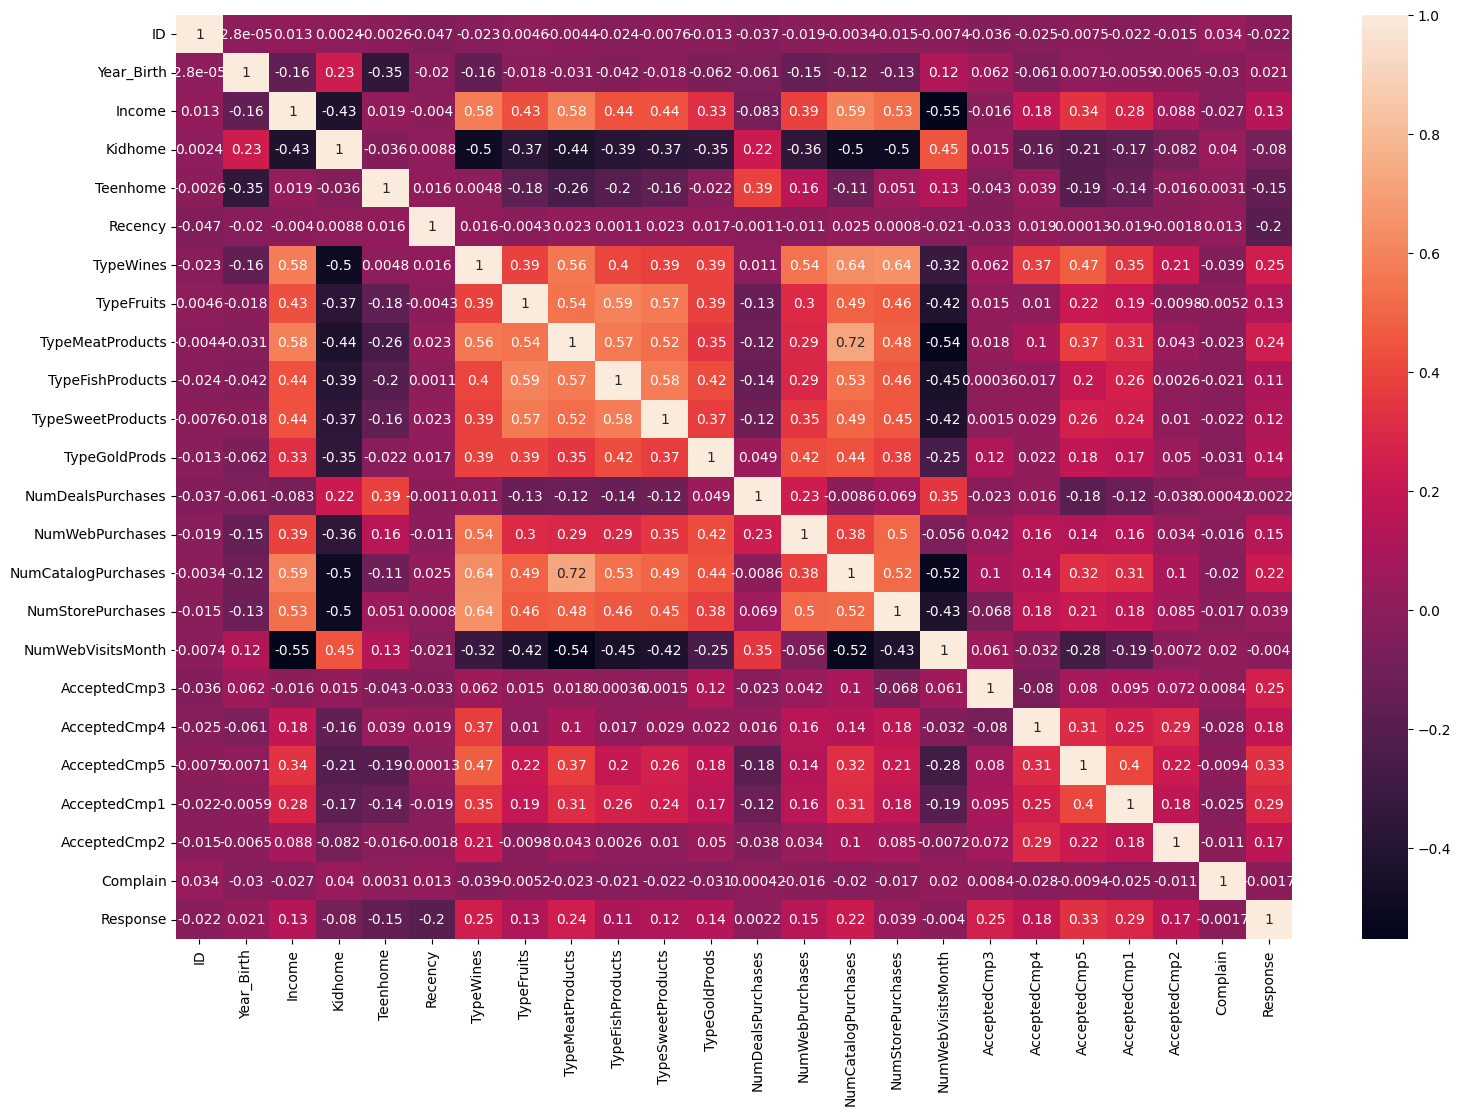

In [13]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

No two columns are too closely related. Some columns have to be removed.

In [15]:
#Fill in the missing values in the 'Income' column of the DataFrame df with the average of all 'Income' columns.
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
TypeWines              False
TypeFruits             False
TypeMeatProducts       False
TypeFishProducts       False
TypeSweetProducts      False
TypeGoldProds          False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,TypeWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2021,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2023,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2022,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2023,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2023,94,173,...,3,6,5,0,0,0,0,0,0,0


In [22]:
#Group status
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

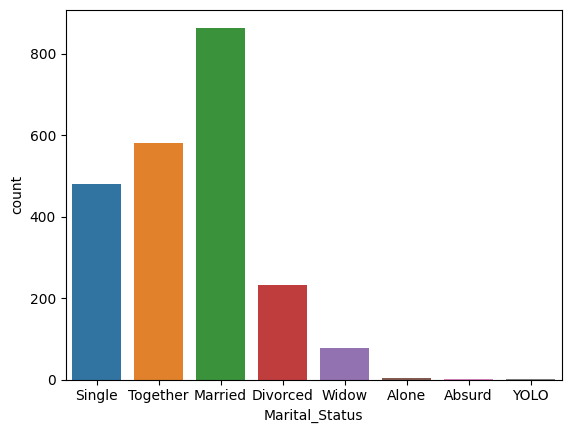

<Figure size 400x400 with 0 Axes>

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot using Seaborn
sns.countplot(data=df, x='Marital_Status')

# Adjust the figure size using Matplotlib
plt.figure(figsize=(4, 4))

# Show the plot
plt.show()

Make a new group to be 'married' 'together' as a 'relationship'
While 'divorced', 'widow', 'alone', 'YOLO', 'nonsense' are 'single'.

In [25]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')


In [26]:
#Count of different values present in Marital_Status
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

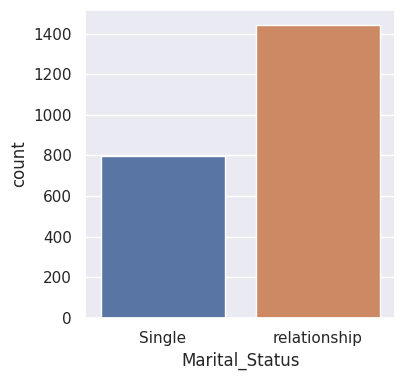

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size using Seaborn
sns.set(rc={'figure.figsize':(4,4)})

# Create a count plot using Seaborn
sns.countplot(data=df, x='Marital_Status')

# Show the plot using Matplotlib
plt.show()

Separating Products to different Dataframe for Association Rule Mining

In [30]:
product_data = []
for i in range(0, len(df)):
  productdata = [df['TypeWines'][i], df['TypeFruits'][i],
                  df['TypeMeatProducts'][i], df['TypeFishProducts'][i],
                  df['TypeSweetProducts'][i], df['TypeGoldProds'][i]]
  product_data.append(productdata)
Products_DF = pd.DataFrame(product_data, columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])
Products_DF.head()

,Wines,Fruits,Meat,Fish,Sweets,Gold
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


Combining different dataframe into a single column to reduce the number of dimension

In [31]:
#Combining different data sets into a single column
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['TypeWines'] + df['TypeFruits'] + df['TypeMeatProducts'] + df['TypeFishProducts'] + df['TypeSweetProducts'] + df['TypeGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

Delete column

In [32]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","TypeWines", "TypeFruits", "TypeMeatProducts", "TypeFishProducts", "TypeSweetProducts", "TypeGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,4/9/2021,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,8/3/2023,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,21/8/2022,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,10/2/2023,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,19/1/2023,94,0,1,422,0,19


In [34]:
#Adding a column "Age" in the dataframe
df['Age'] = 2015 - df["Year_Birth"]
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Improved the data in the 'Education' column to divide education into two main groups, 'PG' (Postgraduate) and 'UG' (Undergraduate), to make the data more compatible and usable in later analysis or graphing. easier

In [35]:
#Changing category into UG and PG only
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [37]:
plt.rcParams.update(plt.rcParamsDefault)

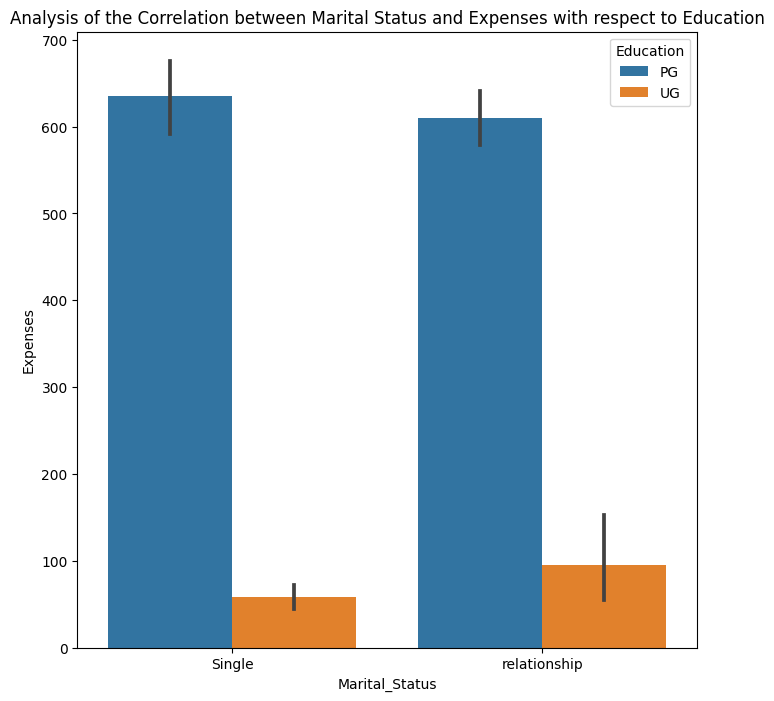

In [38]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Marital_Status'], y=df['Expenses'], hue = df["Education"])
plt.title("Analysis of the Correlation between Marital Status and Expenses with respect to Education")
plt.show()

**An analysis of the relationship between marital status and expenses.**

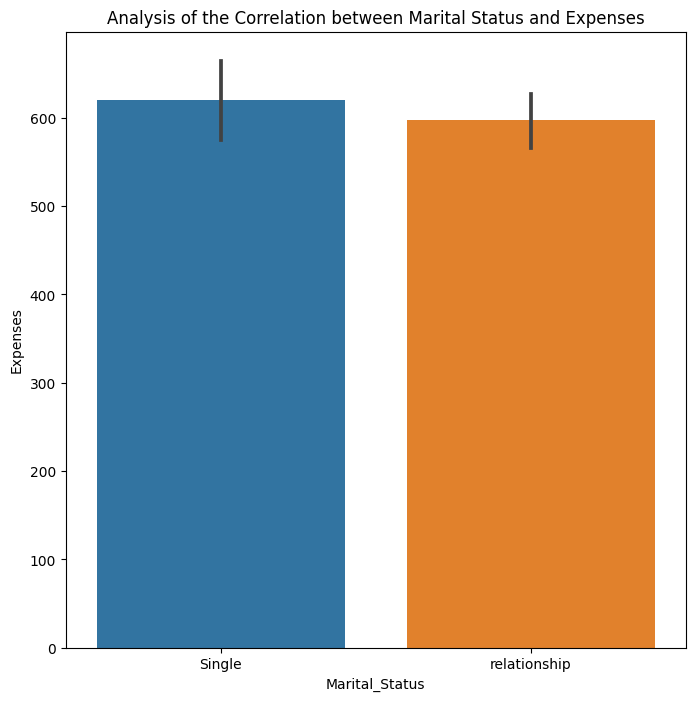

In [39]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Marital_Status'], y=df['Expenses'])
plt.title("Analysis of the Correlation between Marital Status and Expenses")
plt.show()

**การกระจายค่าใช้จ่ายที่เกี่ยวข้องกับสถานภาพการสมรส**

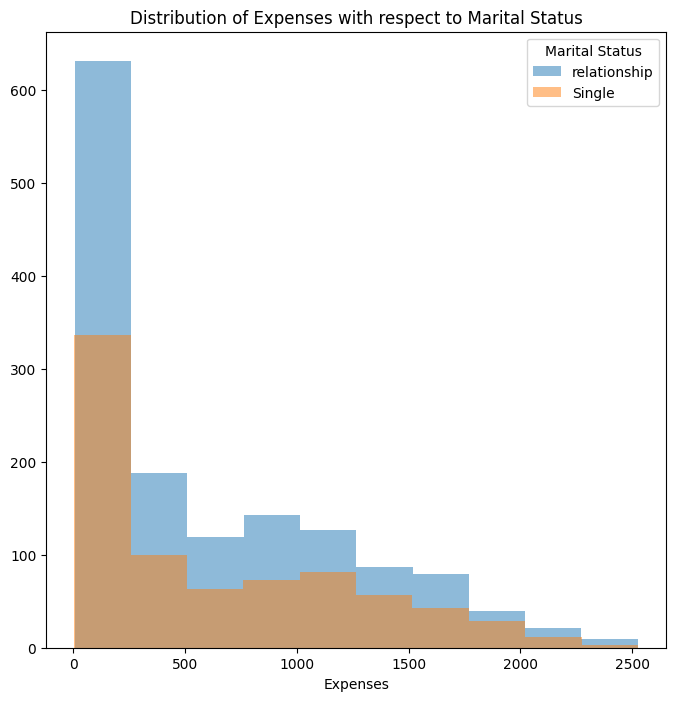

In [40]:
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Expenses", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Expenses with respect to Marital Status")
plt.xlabel("Expenses")
plt.legend(title = "Marital Status")
plt.show()

**การกระจายค่าใช้จ่ายเกี่ยวกับการศึกษา**

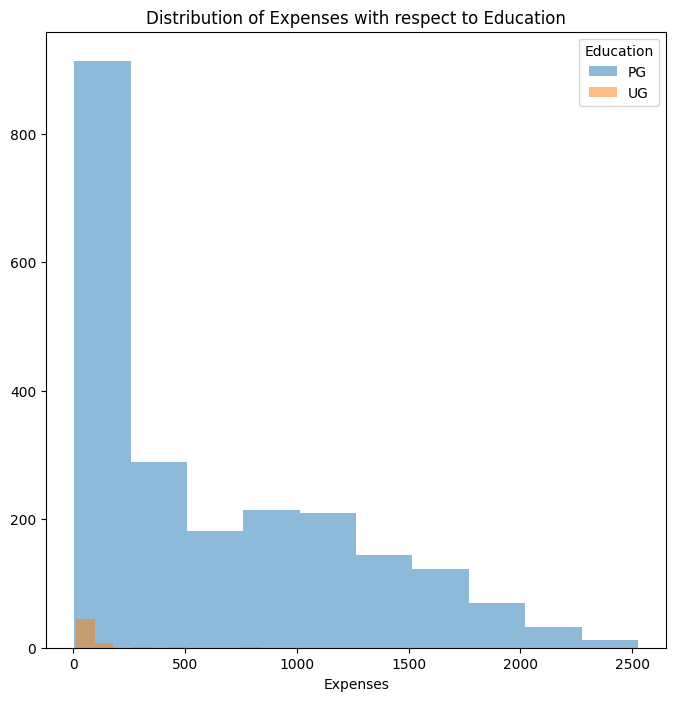

In [41]:
#from numpy.core.fromnumeric import size
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = df[df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("Expenses", data = df[df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Expenses with respect to Education")
plt.xlabel("Expenses")
plt.legend(title = "Education")
plt.show()

จำนวนค่าใช้จ่ายทั้งหมดในการศึกษา

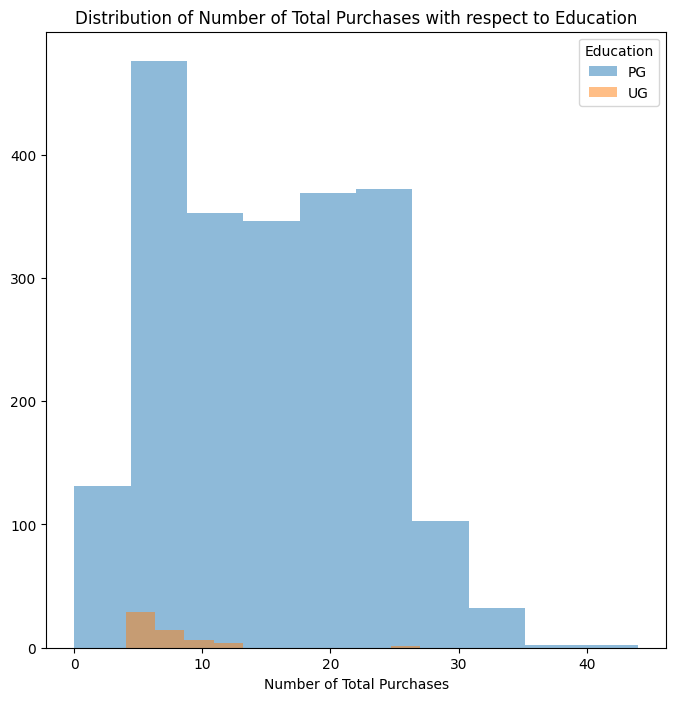

In [42]:
plt.figure(figsize=(8,8))
plt.hist("NumTotalPurchases", data = df[df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("NumTotalPurchases", data = df[df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Number of Total Purchases with respect to Education")
plt.xlabel("Number of Total Purchases")
plt.legend(title = "Education")
plt.show()

การกระจายอายุโดยคำนึงถึงสถานภาพการสมรส

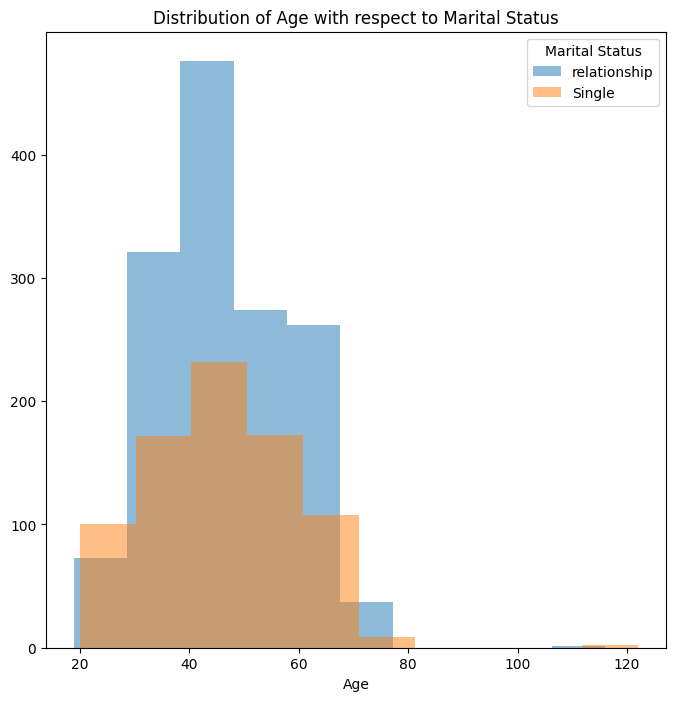

In [43]:
plt.figure(figsize=(8,8))
plt.hist("Age", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Age", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Age with respect to Marital Status")
plt.xlabel("Age")
plt.legend(title = "Marital Status")
plt.show()

การวิเคราะห์การกระจายตัวของประชาชนตามสถานภาพการสมรส

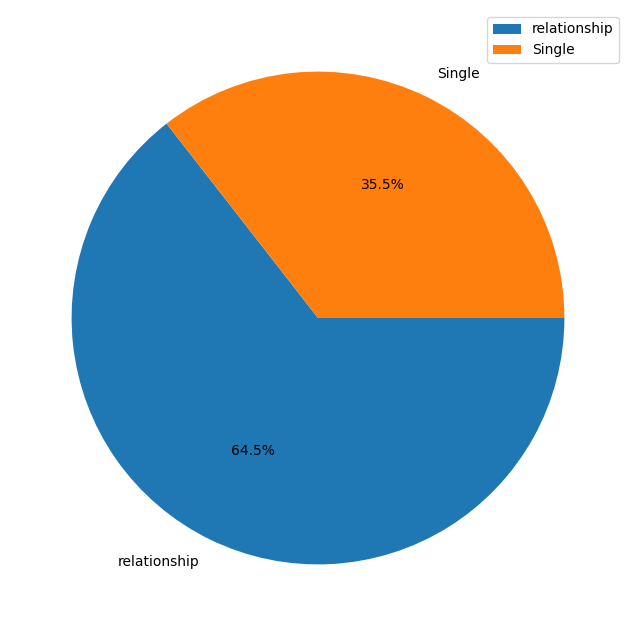

In [44]:
plt.figure(figsize=(8,8))
plt.pie(df["Marital_Status"].value_counts(), labels = ["relationship", "Single"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

**Future Work**

-Relationship between spending and age depth

-Other factor analysis
